### Robot Learning

### Assignment 06

Solutions are due on 27.05.2025 before the lecture.

The following problem is known as the *tiger problem* and goes back to Cassandra, Littman and Kaelbling ($1994$).

A person faces two doors. Behind one, there is a tiger, behind the other, there is a reward of $+1000$. Initially, the person has no information behind which door the tiger or the reward are.

The person can either listen or open one of the doors.

When the door with the tiger behind it is opened, the person will be eaten, which has an associated cost of $–1600$.

Listening costs $–20$. When listening, the person will hear a roaring noise that indicates the presence of a tiger, but only with $0.75$ probability will the person be able to localize the noise correctly. With $0.25$ probability, the noise will appear as if it came from the door hiding the reward.

## Task 6.1)

Provide a formal model of the POMDP, in which you define the state, action, and measurement
spaces, the cost function, and the associated probability functions.

<div style="text-align: right; font-weight:bold"> 4 Points </div>

Please answer in this text cell. It is possible to create tables:

|<i> $p(x_i | x_j , a_L)$ <i> | $j=0$ | $j=1$ |
|------|------|------|
|   $i=0$  | $1$| $0$ |
|   $i=1$  | $0$| $1$ |

## Task 6.2)

What is the expected cumulative reward/cost of the open-loop action sequence: “Listen, listen,open door 1”? Explain your calculation!

<div style="text-align: right; font-weight:bold"> 2 Points </div>

Please answer in this text cell.

## Task 6.3)

What is the expected cumulative reward/cost of the action sequence: “Listen, then open the door for which you did not hear a noise”? Again, explain your calculation!

<div style="text-align: right; font-weight:bold"> 4 Points </div>

Please answer in this text cell.

## Task 6.4)

Perform the one-step backup operation of the POMDP. Plot the resulting piecewise linear value functions in a diagram, just like the ones presented in the lecture. Provide diagrams for all intermediate steps.

Hint: This task is possible to solve on paper, but somewhat tedious. We recommend writing a script to solve it.

<div style="text-align: right; font-weight:bold"> 10 Points </div>

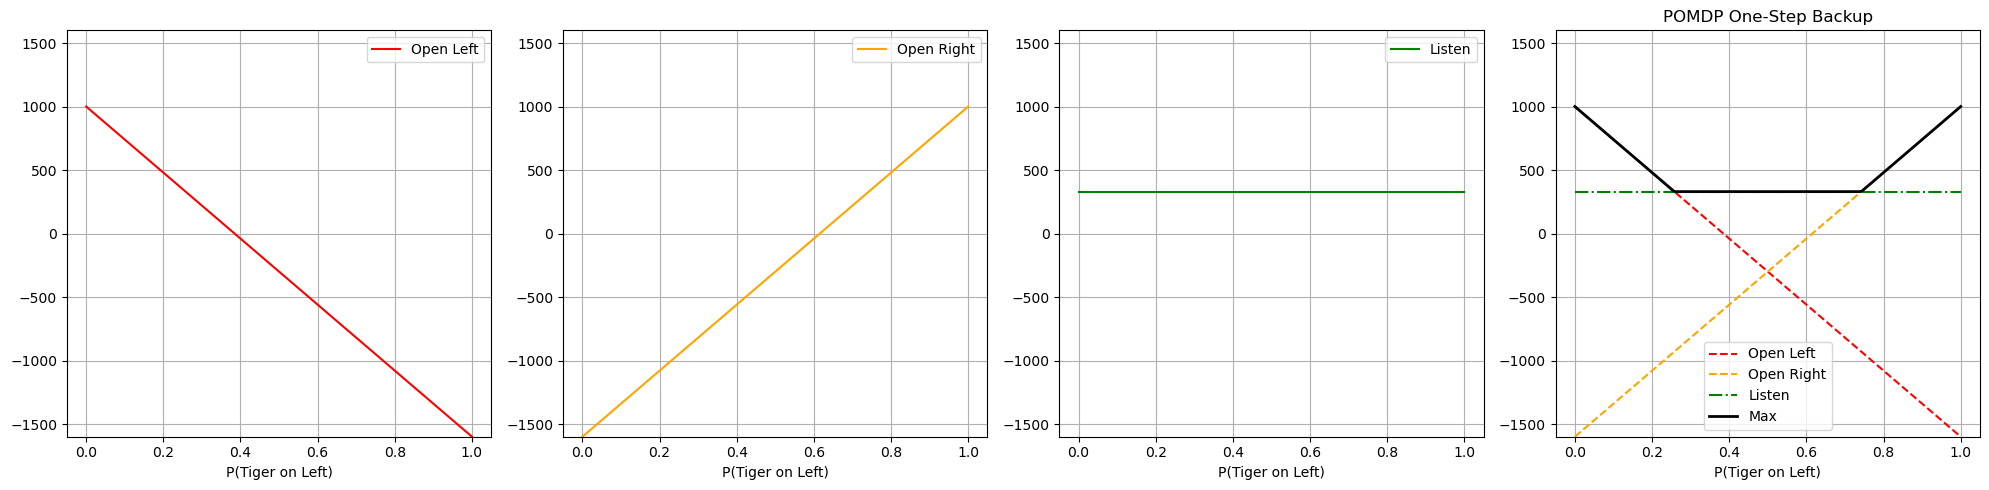

In [48]:
# Your code could go here...

import numpy as np
import matplotlib.pyplot as plt

alpha_open_left = np.array([-1600, 1000])   
alpha_open_right = np.array([1000, -1600])  

obs_prob = {
    0: np.array([0.75, 0.25]), 
    1: np.array([0.25, 0.75])   
}

alpha_vectors = [alpha_open_left, alpha_open_right]

def best_alpha(obs_idx):
    best_val = -np.inf
    best_vec = None
    for alpha in alpha_vectors:
        val = sum(obs_prob[s][obs_idx] * alpha[s] for s in [0, 1])
        if val > best_val:
            best_val = val
            best_vec = alpha
    return best_vec

listen_cost = -20
alpha_listen = np.zeros(2)

for s in [0, 1]:
    total = 0
    for o in [0, 1]: 
        best = best_alpha(o)
        total += obs_prob[s][o] * best[s]
    alpha_listen[s] = listen_cost + total

beliefs = np.linspace(0, 1, 200)
V_left = beliefs * alpha_open_left[0] + (1 - beliefs) * alpha_open_left[1]
V_right = beliefs * alpha_open_right[0] + (1 - beliefs) * alpha_open_right[1]
V_listen = beliefs * alpha_listen[0] + (1 - beliefs) * alpha_listen[1]

V_max = np.maximum.reduce([V_left, V_right, V_listen])

def plot_step(xlable, n):
    axs[n].set_xlabel(xlable)
    axs[n].set_ylim(-1600, 1600)
    axs[n].grid(True)
    axs[n].legend()
    
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].plot(beliefs, V_left, label='Open Left', color='red')
plot_step('P(Tiger on Left)', 0)
axs[1].plot(beliefs, V_right, label='Open Right', color='orange')
plot_step('P(Tiger on Left)', 1)
axs[2].plot(beliefs, V_listen, label='Listen', color='green')
plot_step('P(Tiger on Left)', 2)

axs[3].plot(beliefs, V_left, label='Open Left', linestyle='--', color='red')
axs[3].plot(beliefs, V_right, label='Open Right', linestyle='--', color='orange')
axs[3].plot(beliefs, V_listen, label='Listen', linestyle='-.', color='green')
axs[3].plot(beliefs, V_max, label='Max', color='black', linewidth=2)
axs[3].set_title('POMDP One-Step Backup')
plot_step('P(Tiger on Left)', 3)

plt.tight_layout()
plt.show()

... or you could answer in this text cell.